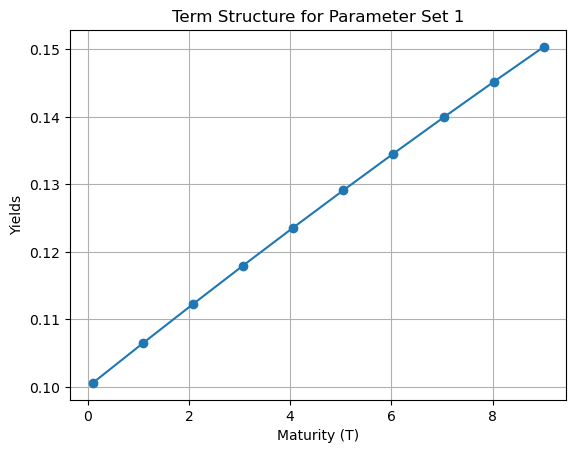

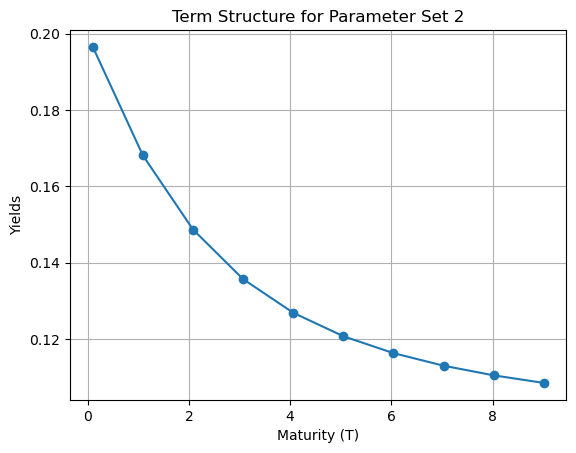

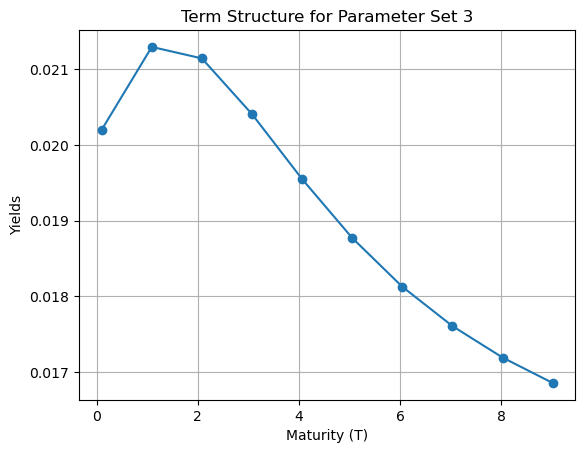

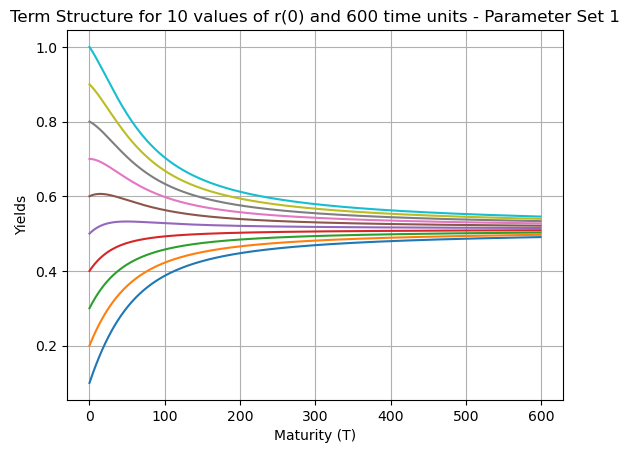

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Define the parameter sets
params = [[0.02, 0.7, 0.02, 0.1], [0.7, 0.1, 0.3, 0.2], [0.06, 0.09, 0.5, 0.02]]

# Function to calculate yields using the CIR model
def cir_model(beta, mu, sigma, r, t, T_values):
    yields = []
    for T in T_values:  
        gamma = math.sqrt(beta*beta + 2*sigma*sigma)
        B = 2 *(np.exp(gamma*(T - t)) - 1)  / ((gamma + beta) * (np.exp(gamma*(T - t)) - 1) + 2*gamma)
        A = math.pow(( 2*gamma*np.exp(0.5*(beta + gamma)*(T - t)) ) / ((gamma + beta)*(np.exp(gamma*(T - t)) - 1) + 2*gamma), 2*beta*mu /(sigma*sigma)) 
        price = A * np.exp(-B*r)
        y = -math.log(price) / (T - t)
        yields.append(y)
    return yields

# Plot term structure for each parameter set
for i in range(3):
    beta, mu, sigma, r = params[i]
    T = np.linspace(0.1, 10, num=10, endpoint=False)
    yields = cir_model(beta, mu, sigma, r, 0, T)

    plt.plot(T, yields, marker='o')
    plt.xlabel('Maturity (T)')
    plt.ylabel('Yields')
    plt.title(f'Term Structure for Parameter Set {i + 1}')
    plt.grid(True)
    plt.show()

# Plot term structure for 10 different values of r(0) & 600 time units for the first parameter set
T = np.linspace(0.1, 600, num=600, endpoint=False)
r_values = [0.1 * i for i in range(1, 11)]
beta, mu, sigma, _ = params[0]
for r in r_values:
    yields = cir_model(beta, mu, sigma, r, 0, T)
    plt.plot(T, yields)

plt.xlabel('Maturity (T)')
plt.ylabel('Yields')
plt.title('Term Structure for 10 values of r(0) and 600 time units - Parameter Set 1')
plt.grid(True)
plt.show()